<a href="https://colab.research.google.com/github/mb1te/cm/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Задание 1.** Объясните, какой системе условий должен удовлетворять каждый из четырёх многочленов $3$-ей степени при данных $f(0),f(1),f'(0),f'(1).$ Как можно непосредственно из этой системы условий найти коэффициенты этих многочленов?
Если $x\in[a,b]$, тогда $\displaystyle k=\frac{x−a}{b−a}=\frac{x−a}{h}$.

$H_3(x) = p_{00}(k)f(a) + p_{01}(k)f(b) + p_{01}{k}f'(a) + p_{11}(k)f'(b)$

$p_{ij}(k) = a_0 + a_1 k + a_2 k^2 + a_3 k^3$

$p_{ij}'(k) = a_1 + 2a_2 k + 3a_3 k^2$

$H_3 (0) = f(0), H_3(1) = f(1), H_3'(0) = f'(0), H_3'(1) = f'(1)$

Методом неопределенных коэффицентов получаем следующие системы, решим их при помощи метода Гаусса:

$p_{00}(k): \begin{cases} 
a_0 = 1\\
a_0 + a_1 + a_2 + a_3 = 0\\
a_1 = 0\\
a_1 + 2a_2 + 3a_3 = 0
\end{cases}
$

In [ ]:
left = np.array([[1, 0, 0, 0], [1, 1, 1, 1], [0, 1, 0, 0], [0, 1, 2, 3]])
right = np.array([1, 0, 0, 0])
np.linalg.solve(left, right)

array([ 1.,  0., -3.,  2.])

Получили $p_{00}(k) = 1 - 3k^2 + 2k^3$.

$p_{01}(k): \begin{cases} 
a_0 = 0\\
a_0 + a_1 + a_2 + a_3 = 1\\
a_1 = 0\\
a_1 + 2a_2 + 3a_3 = 0
\end{cases}
$

In [ ]:
left = np.array([[1, 0, 0, 0], [1, 1, 1, 1], [0, 1, 0, 0], [0, 1, 2, 3]])
right = np.array([0, 1, 0, 0])
np.linalg.solve(left, right)

array([ 0.,  0.,  3., -2.])

Получили $p_{01}(k) = 3k^2 - 2k^3$.

$p_{10}(k): \begin{cases} 
a_0 = 0\\
a_0 + a_1 + a_2 + a_3 = 0\\
a_1 = 1\\
a_1 + 2a_2 + 3a_3 = 0
\end{cases}
$

In [ ]:
left = np.array([[1, 0, 0, 0], [1, 1, 1, 1], [0, 1, 0, 0], [0, 1, 2, 3]])
right = np.array([0, 0, 1, 0])
np.linalg.solve(left, right)

array([ 0.,  1., -2.,  1.])

Получили $p_{10}(k) = k - 2k^2 +k^3$.

$p_{11}(k): \begin{cases} 
a_0 = 0\\
a_0 + a_1 + a_2 + a_3 = 0\\
a_1 = 0\\
a_1 + 2a_2 + 3a_3 = 1
\end{cases}
$

In [ ]:
left = np.array([[1, 0, 0, 0], [1, 1, 1, 1], [0, 1, 0, 0], [0, 1, 2, 3]])
right = np.array([0, 0, 0, 1])
np.linalg.solve(left, right)

array([ 0.,  0., -1.,  1.])

Получили $p_{11}(k) = -k^2 + k^3$.

$h = b - a = 1$

Итого $H_3(x)=(1−3k^2+2k^3)f(a)+(3k^2−2k^3)f(b)+(k−2k^2+k^3)f'(a)+(−k^2+k^3)f'(b)$ 

**Задание 2.1.** Выбрать на плоскости 2 произвольные точки в качестве узлов и *показать*, как влияют значения производных в этих точках на поведение многочлена.

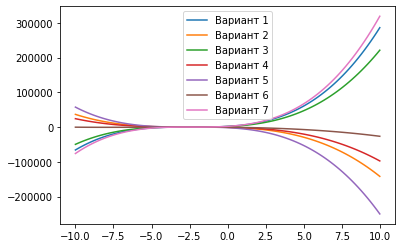

In [ ]:
x_a = 20 * np.random.random() - 10
x_b = 20 * np.random.random() - 10
y_a = 20 * np.random.random() - 10
y_b = 20 * np.random.random() - 10

def h(x, y_a_dif, y_b_dif):
  k = x - x_a
  return (1 - 3 * k**2 + 2 * k**3) * y_a + (3 * k**2 - 2 * k**3) * y_b + (k - 2 * k**2 + k**3) * y_a_dif + (-1 * k**2 + k**3) * y_b_dif

for i in range(1, 8):
  y_a_dif = 200 * np.random.random() - 100
  y_b_dif = 200 * np.random.random() - 100
  x_space = np.linspace(-10, 10, 100)
  y_space = [h(x, y_a_dif, y_b_dif) for x in x_space]
  plt.plot(x_space, y_space, label=f'Вариант {i}')
plt.legend()
plt.show()


$2)$ Кусочно интерполировать функцию $\displaystyle f(x)=\frac{1}{1+dx^2}, x\in[-1,1]; d = 5 + k, k=\overline{1,20}$ с использованием формулы $(3)$ на каждом участке равномерного разбиения с шагом $0.1$

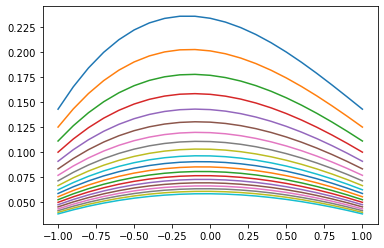

In [ ]:
for K in range(1, 21):
  d = 5 + K
  def f(x):
    return 1 / (1 + d * x**2)
  def f_dif(x):
    return -2 * d * x / (1 + d * x)**2
  x_space = np.linspace(-1, 1, 21)
  def y(x):
    k = (x + 1) / 2
    return  (1 - 3 * k**2 + 2 * k**3) * f(-1) + (3 * k**2 - 2 * k**3) * f(1) + (k - 2 * k**2 + k**3) * f_dif(-1) + (-1 * k**2 + k**3) * f_dif(1)
  y_space = [y(x) for x in x_space]
  plt.plot(x_space, y_space)
plt.show()
